In [64]:
import sys
import os
sys.path.append("..")
from geomatry.opt_Energy_approximated.optimizer import MultipleSystemOptimizer
from geomatry.opt.loss import rmsd_loss
from geomatry.ff.graph import get_given_graph_builder
from geomatry.ff.springs import SpringFF, _random_spring_systems, _random_spring_ff_param
from geomatry.ff.NN import NNPotentialFF, _random_nn_systems, _random_nn_ff_param
import torch
import copy

def onlyRsquare(k_perturbed, r0_perturbed, optimizer):
    ff.reset_parameters(k_perturbed, r0_perturbed)
    params_0 = ff.state_dict()
    print("params_optimized",optimizer.optimize(params_0))
    print("params_answer",k, r0)
    return copy.deepcopy(params_0)

import copy

systemN = 30
N = 7
N_pairs = 21
max_Za = 1
Ras, Zas, idx_is, idx_js = _random_nn_systems(systemN, N, N_pairs, max_Za, start_Za=1)
params = _random_nn_ff_param(max_Za)
ff = NNPotentialFF(max_Za)
ff.reset_parameters(params)

fixed_atom_indices = [0,1,2,3,4,5]
graph_builders = [get_given_graph_builder(idx_i, idx_j) for idx_i, idx_j in zip(idx_is, idx_js)]


k, r0 = _random_spring_ff_param(max_Za,k_max=10,r0_max=2)
r0[1,1] = 0.7
print(k, r0)
ff_spring = SpringFF(max_Za)
ff_spring.reset_parameters(k, r0)
import copy
params_spring = copy.deepcopy(ff_spring.state_dict())
optimizer_spring = MultipleSystemOptimizer(
    Ras, Zas, graph_builders, ff_spring, rmsd_loss, 
    params_star=params_spring,
    fixed_atom_indices=fixed_atom_indices,
    fmax=1e-5, reoptimize=True
)
e_size=0.06

optimizer = MultipleSystemOptimizer(
    optimizer_spring.Ra_stars, Zas, graph_builders, ff, rmsd_loss, 
    params_star=params,
    fixed_atom_indices=fixed_atom_indices,
    fmax=1e-5, reoptimize=False
)
optimizer_Energy = optimizer

optimizer.ff.changeParamByInputDistribution(e_size,optimizer_spring.Ra_stars,Zas,graph_builders)
params=copy.deepcopy(optimizer.ff.state_dict())
#print('start', params_0)
#print('goal',params_star)


tensor([[2.4653, 1.5423],
        [1.5423, 9.2528]], dtype=torch.float64) tensor([[0.5877, 1.4872],
        [1.4872, 0.7000]], dtype=torch.float64)
{'1_1': [tensor(0.5731, dtype=torch.float64), tensor(1.4578, dtype=torch.float64), tensor(0.7160, dtype=torch.float64), tensor(0.9456, dtype=torch.float64), tensor(3.2777, dtype=torch.float64), tensor(1.6650, dtype=torch.float64), tensor(0.7405, dtype=torch.float64), tensor(3.0137, dtype=torch.float64), tensor(2.1952, dtype=torch.float64), tensor(1.1353, dtype=torch.float64), tensor(2.8089, dtype=torch.float64), tensor(2.4970, dtype=torch.float64), tensor(2.1470, dtype=torch.float64), tensor(1.7503, dtype=torch.float64), tensor(0.4069, dtype=torch.float64), tensor(3.5435, dtype=torch.float64), tensor(0.8977, dtype=torch.float64), tensor(1.3097, dtype=torch.float64), tensor(1.3541, dtype=torch.float64), tensor(1.4344, dtype=torch.float64), tensor(1.0274, dtype=torch.float64), tensor(0.5731, dtype=torch.float64), tensor(1.4578, dtype=torch.fl

In [65]:
print(optimizer_Energy.Ra_stars)

[tensor([[ 0.3780, -1.1526, -1.0495],
        [-0.8392, -0.7515, -0.7796],
        [-0.2192, -0.6376, -0.3910],
        [ 1.0194, -0.5776,  0.3754],
        [-0.2852, -0.6055, -0.7912],
        [ 0.3355,  1.7434,  0.9920],
        [ 0.1397, -0.0733, -0.1352]], dtype=torch.float64), tensor([[ 0.7056,  0.1555,  0.3788],
        [ 0.0381, -0.1439,  1.0688],
        [-1.2378, -1.3914, -1.9915],
        [ 0.5130,  0.4268, -1.6699],
        [-0.9852,  0.1886, -0.5635],
        [-0.5792, -1.3977, -1.5498],
        [-0.2176, -0.4138, -0.7070]], dtype=torch.float64), tensor([[ 0.2306, -0.0686,  1.1461],
        [-0.3049, -0.2820,  0.0889],
        [ 0.3339, -0.1010, -0.1035],
        [ 0.3327,  0.1792, -0.5356],
        [-1.3442, -0.0932,  0.6987],
        [-0.1091, -1.1194, -0.9594],
        [-0.1653, -0.5100,  0.1601]], dtype=torch.float64), tensor([[ 1.8063,  0.0896, -0.1792],
        [-1.6342,  0.2550,  0.8852],
        [ 0.5584, -0.1164,  0.4520],
        [-0.8759,  0.5909,  0.0713],
     

In [66]:
print(ff.state_dict().keys())
print(ff.nets['0_0'].state_dict().keys())


odict_keys(['nets.0_0.net.0.weight', 'nets.0_0.net.0.bias', 'nets.0_0.net.2.weight', 'nets.0_0.net.2.bias', 'nets.0_0.net.4.weight', 'nets.0_0.net.4.bias', 'nets.0_1.net.0.weight', 'nets.0_1.net.0.bias', 'nets.0_1.net.2.weight', 'nets.0_1.net.2.bias', 'nets.0_1.net.4.weight', 'nets.0_1.net.4.bias', 'nets.1_1.net.0.weight', 'nets.1_1.net.0.bias', 'nets.1_1.net.2.weight', 'nets.1_1.net.2.bias', 'nets.1_1.net.4.weight', 'nets.1_1.net.4.bias'])
odict_keys(['net.0.weight', 'net.0.bias', 'net.2.weight', 'net.2.bias', 'net.4.weight', 'net.4.bias'])


nan
Ra_star_energy tensor(169.0338, dtype=torch.float64, grad_fn=<DivBackward0>)


/var/folders/d9/j9pnzj2s30jf7r3wxfwp0yz80000gn/T/ipykernel_23428/17311721.py:18: RuntimeWarning: invalid value encountered in divide
  return direction/np.linalg.norm(direction)
/var/folders/d9/j9pnzj2s30jf7r3wxfwp0yz80000gn/T/ipykernel_23428/17311721.py:32: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Ra_temp[:,:]+=x[i]*n1
/var/folders/d9/j9pnzj2s30jf7r3wxfwp0yz80000gn/T/ipykernel_23428/17311721.py:35: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Ra_temp[:,:]-=x[i]*n1


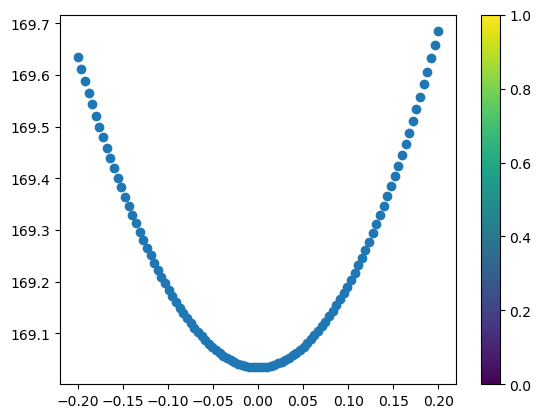

In [67]:
#Draw energy landscape near real optimal geometry
#In direction towards current local minimum
from torch import FloatTensor, IntTensor
from ase import Atoms
import numpy as np
import matplotlib.pyplot as plt

def get_ase_atoms(Ra: FloatTensor, Za: IntTensor) -> Atoms:
    return Atoms(
        positions=Ra.detach().cpu().numpy(),
        numbers=Za.detach().cpu().numpy()
    )

def getMaxDirection(optimizer, params_0, index):
    Ra_star_0=optimizer.fitting._get_Ra_star(params_0,optimizer.graph_builders[index],optimizer.Ra_stars[index],optimizer.Zas[index],optimizer.fixed_atom_indices)
    direction=(Ra_star_0-optimizer.Ra_stars[index]).detach().numpy()
    direction[fixed_atom_indices,:]=0
    return direction/np.linalg.norm(direction)

def drawGraphs(optimizer,params, index):
    n1=getMaxDirection(optimizer,params, index)
    if (np.isnan(n1[0,0])):
        print('nan')
        n1=np.zeros(n1.shape)
        n1[-1,0]=1
    optimizer.ff.reset_parameters(params['k'],params['r0'])
    Ra_temp=copy.deepcopy(optimizer.Ra_stars[index])
    atoms=get_ase_atoms(Ra_temp, optimizer.Zas[index])
    x=np.linspace(-0.2,0.2,100)
    z1=copy.deepcopy(x)
    for i in range(100):
        Ra_temp[:,:]+=x[i]*n1
        E0=optimizer.ff.get_E(Ra_temp,optimizer.Zas[index],*optimizer.graph_builders[index](atoms))
        z1[i]=E0
        Ra_temp[:,:]-=x[i]*n1
    #z1[z1>30]=30
    print('Ra_star_energy',optimizer.ff.get_E(Ra_temp,optimizer.Zas[index],*optimizer.graph_builders[index](atoms)))
    plt.scatter(x,z1)
    plt.colorbar()
drawGraphs(optimizer_spring,params_spring,0)

tensor([ 2.0357,  2.2259, -1.2404, -0.9781, -3.3823,  2.7438, -5.1443, -0.0087,
        -6.1894,  1.0405], dtype=torch.float64)
params_0 odict_keys(['nets.0_0.net.0.weight', 'nets.0_0.net.0.bias', 'nets.0_0.net.2.weight', 'nets.0_0.net.2.bias', 'nets.0_0.net.4.weight', 'nets.0_0.net.4.bias', 'nets.0_1.net.0.weight', 'nets.0_1.net.0.bias', 'nets.0_1.net.2.weight', 'nets.0_1.net.2.bias', 'nets.0_1.net.4.weight', 'nets.0_1.net.4.bias', 'nets.1_1.net.0.weight', 'nets.1_1.net.0.bias', 'nets.1_1.net.2.weight', 'nets.1_1.net.2.bias', 'nets.1_1.net.4.weight', 'nets.1_1.net.4.bias'])


  0%|          | 0/8001 [00:00<?, ?it/s]

0 curvature -11.809371838161676 4.203826590043003 distance -0.14483846697227404 loss 67.25679471244366
trueloss 67.25679471244366
loss 48.8351121732434
tensor([-0.2205, -0.2618, -0.1424, -0.2178, -0.2162, -0.2463, -0.2237, -0.2451,
        -0.1142, -0.2432], dtype=torch.float64, grad_fn=<SubBackward0>)


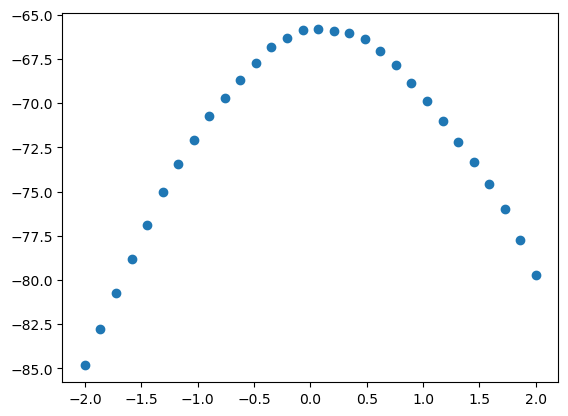

 50%|████▉     | 4000/8001 [12:49<12:14,  5.45it/s]

4000 curvature 2.563001426256943 0.19402303159817777 distance 0.10782538550496744 loss 0.6062525046634867
trueloss 0.6062525046634867
loss 0.6062525046634867
tensor([0.0820, 0.2330, 0.1619, 0.1931, 0.2414, 0.2617, 0.2234, 0.0969, 0.1494,
        0.0829], dtype=torch.float64, grad_fn=<SubBackward0>)


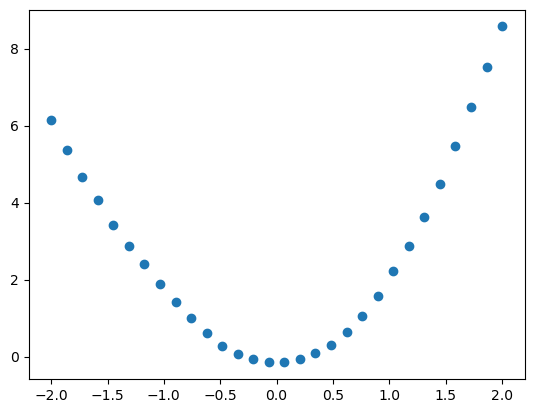

100%|█████████▉| 8000/8001 [25:09<00:00,  4.96it/s]

8000 curvature 7.068042923646912 0.02812010475514006 distance 0.06164545662719012 loss 0.36846697387312377
trueloss 0.36846697387312377
loss 0.36846697387312377
tensor([0.2674, 0.2521, 0.2074, 0.4100, 0.4630, 0.1597, 0.3673, 0.2374, 0.3898,
        0.2710], dtype=torch.float64, grad_fn=<SubBackward0>)


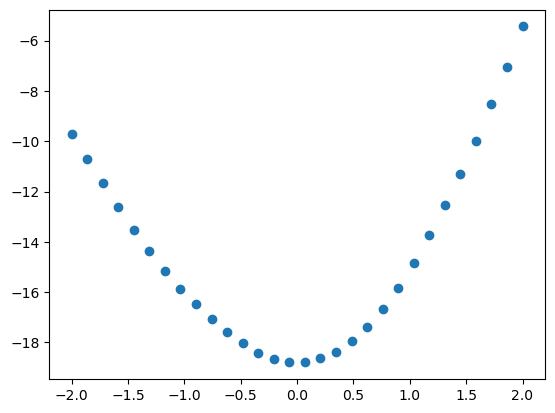

100%|██████████| 8001/8001 [25:10<00:00,  5.30it/s]


In [68]:
def energyAndRsquare(params, optimizer):
    ff.reset_parameters(params)
    params_0 = ff.state_dict()
    print("params_0", params_0.keys())
    for i in range(1):
        params_0=optimizer.optimize(params_0, 8001, 4000, e_size, 10, 2)
    return params_0
print(params['nets.1_1.net.0.bias'])
new_params_0=energyAndRsquare(params, optimizer)


0.6960272863001904


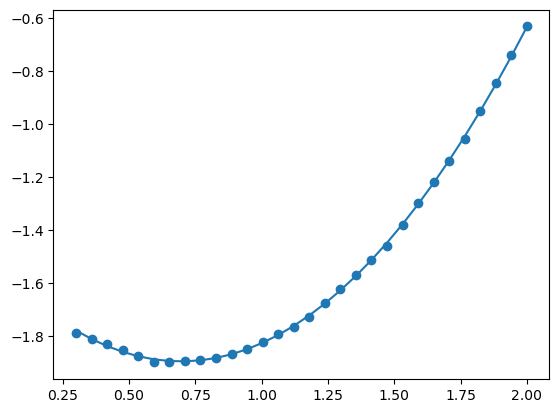

In [70]:
import matplotlib.pyplot as plt
import scipy

optimizer_Energy.ff.reset_parameters(new_params_0)
x=torch.linspace(0.3,2,30,dtype=torch.float64)
y=optimizer_Energy.ff.nets['1_1'](x)
coeff=np.polyfit(x.detach().numpy(),y.detach().numpy(),deg=2)
print(-coeff[1]/2/coeff[0])
plt.scatter(x.detach().numpy(),y.detach().numpy())
plt.plot(x.detach().numpy(),(coeff[0]*(x**2)+coeff[1]*x+coeff[2]).detach().numpy())